# Tuning Neural Networking in Keras

We will use the version of Keras that comes in the Tensorflow package, as it has the most up to date tools.

Keras works as weapper for deep learning model to be used as classification or regression estimators in sklearn

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, \
classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# new libraries
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Plot History

Since we will be plotting histories for all of our models, lets create a function to do it quickly.

In [2]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

# Data

We will be working with 2 different datasets in this project, 1 is a regression dataset and the other is a classification dataset.  This way you can practice doing both using deep learning.

**NOTE**

These datasets are very small for deep learning.  Deep learning models usually work best with very large datasets with at least 10,000 or more samples.  They work best on even larger datasets than that.  But, for demonstration we will use these smaller datasets.

## Regression
This is a dataset of housing prices in Boston from 1978.  Each row is a house and the dataset includes several features regarding each house.  Our target today will be the price of the home.



In [3]:
regression_df = pd.read_csv('https://raw.githubusercontent.com/ninja-josh/image-storage/main/Boston_Housing_from_Sklearn.csv')

# Regression

Let's start with modeling the regression dataset

In [4]:
regression_df

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67,22.4
502,0.04527,0.573,6.120,76.7,21.0,9.08,20.6
503,0.06076,0.573,6.976,91.0,21.0,5.64,23.9
504,0.10959,0.573,6.794,89.3,21.0,6.48,22.0


In [5]:
regression_df.duplicated().any()

False

In [6]:
regression_df.describe()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


In [7]:
# Define X and Y and complete the train test split
X = regression_df.drop(columns = 'PRICE')
y = regression_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

## Scaling

Always scale your data for deep learning.  Otherwise you get a problem call 'Exploding Weights'.  Some weights will be updated much faster than others because the inputs are at larger scales.  This tends to hurt learning as data on smaller scales does not update as fast and doesn't get to contribute as much to the decision making process.  By scaling we put all features on the same footing.

In [8]:
# Scale the data
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## First Simple Model

We always want to start simple, as deep learning models can get very complex fast and more complex models take more time to train and are more prone to overfitting.  A well performing simple model is better than a well performing complex model.

## Input layer
The first layer we will define is not technically the input layer.  We will define the first hidden layer with a special argument that tells Keras how to create a input layer:

`input_dim=`

Input layers can also be defined manually using tensorflow.keras.layers.InputLayer

## Activation function

For the single hidden layer we will try just 3 nodes and use a ReLU activation.  ReLUs tend to perform well for hidden nodes.

## Output Layer

For out output layer (last layer) we just use one node because we only want the output of the model to be one number.  We will use a linear activation function.  This will simply output the value from the weights and bias in the node with no change.  The output will be a continuous number, a float.  This will make our model a regression model.




In [9]:
# Check the shape of input

X_train.shape[1]

6

In [10]:
# Instantiate your sequential model

reg_model = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model.add(Dense(10, activation='relu', input_dim=input_dim, name='h1'))
reg_model.add(Dense(10, activation='relu', name='h2'))
# Add output layer with 1 node
reg_model.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 10)                70        
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


## Compiling

Compiling the model puts all the pieces together to make it ready to train.  We need to specify:

* **Optimizer:** An Adam optimizer is a favorite and often performs well, it's a good place to start.
  - Other optimizers : Gradient Descent,Stochastic Gradient Descent,Adagrad,RMSProp
* **Loss Function:** 'mse' or mean squared error.  This is the number our model will try to reduce in each epoch.  Since this is a regression model we want our model to minimize the mean squared error.
* **Metrics:** 'mae' or mean absolute error.  We can provide a list of any appropriate metrics we want the model to keep track at each epoch.




In [11]:
from tensorflow.keras.metrics import RootMeanSquaredError

In [12]:
# Compile your model.
rmse = RootMeanSquaredError(name='rmse')

reg_model.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

# Training

Let's try training our model for 100 few epochs.  Sometimes that is enough, and it will give us an idea whether our model is learning anything.

In [13]:
# Fit your model

history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100)


Epoch 1/100
12/12 [==============================] - 5s 90ms/step - loss: 617.4598 - mae: 23.0124 - rmse: 24.8487 - val_loss: 530.4266 - val_mae: 21.4714 - val_rmse: 23.0310
Epoch 2/100
12/12 [==============================] - 0s 16ms/step - loss: 614.5243 - mae: 22.9443 - rmse: 24.7896 - val_loss: 527.8371 - val_mae: 21.4062 - val_rmse: 22.9747
Epoch 3/100
12/12 [==============================] - 0s 30ms/step - loss: 611.7544 - mae: 22.8792 - rmse: 24.7337 - val_loss: 525.3424 - val_mae: 21.3427 - val_rmse: 22.9203
Epoch 4/100
12/12 [==============================] - 0s 21ms/step - loss: 608.9427 - mae: 22.8124 - rmse: 24.6768 - val_loss: 522.2706 - val_mae: 21.2654 - val_rmse: 22.8532
Epoch 5/100
12/12 [==============================] - 1s 48ms/step - loss: 604.9147 - mae: 22.7197 - rmse: 24.5950 - val_loss: 517.6476 - val_mae: 21.1466 - val_rmse: 22.7519
Epoch 6/100
12/12 [==============================] - 1s 70ms/step - loss: 599.3259 - mae: 22.5843 - rmse: 24.4811 - val_loss: 511.

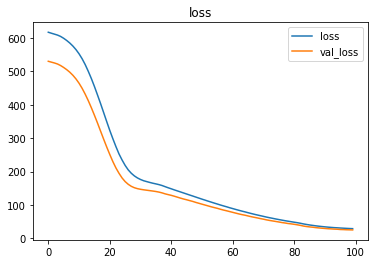

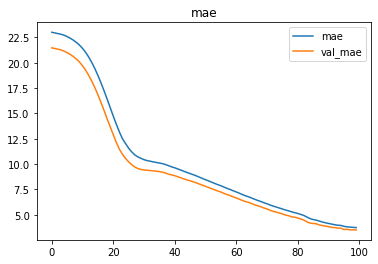

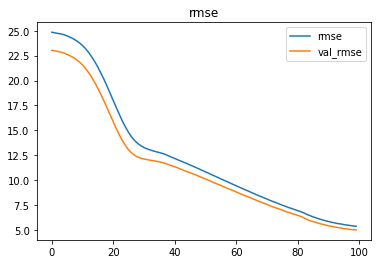

In [14]:
# Apply the custom function to see how your model is doing
plot_history(history)

## Evaluation


In [15]:
# Make predictions and evaluate your model
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

print('training MAE:', mean_absolute_error(y_train, train_preds))
print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('training R2:', r2_score(y_train, train_preds))
print('\n')
print('testing MAE:', mean_absolute_error(y_test, test_preds))
print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('testing R2:', r2_score(y_test, test_preds))

4/4 [==============================] - 0s 3ms/step
training MAE: 3.7119638453058323
training rmse: 5.340850376294159
training R2: 0.6783477019796071


testing MAE: 3.494978653915285
testing rmse: 4.996363128594822
testing R2: 0.6435147399982024


# <center> Attack Bias or Variance? </center>

How should we tune this regression model?

In [16]:
# Instantiate your sequential model

reg_model = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model.add(Dense(100, activation='relu', input_dim=input_dim, name='h1'))
reg_model.add(Dense(100, activation='relu', name='h2'))
# Add output layer with 1 node
reg_model.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 100)               700       
                                                                 
 h2 (Dense)                  (None, 100)               10100     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


## Compiling

Compiling the model puts all the pieces together to make it ready to train.  We need to specify:

* **Optimizer:** An Adam optimizer is a favorite and often performs well, it's a good place to start.
  - Other optimizers : Gradient Descent,Stochastic Gradient Descent,Adagrad,RMSProp
* **Loss Function:** 'mse' or mean squared error.  This is the number our model will try to reduce in each epoch.  Since this is a regression model we want our model to minimize the mean squared error.
* **Metrics:** 'mae' or mean absolute error.  We can provide a list of any appropriate metrics we want the model to keep track at each epoch.




In [17]:
from tensorflow.keras.metrics import RootMeanSquaredError

In [18]:
# Compile your model.
rmse = RootMeanSquaredError(name='rmse')

reg_model.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

# Training

Let's try training our model for 100 few epochs.  Sometimes that is enough, and it will give us an idea whether our model is learning anything.

In [19]:
# Fit your model

history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100)


Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 591.1872 - mae: 22.3996 - rmse: 24.3143 - val_loss: 488.8431 - val_mae: 20.4085 - val_rmse: 22.1098
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 547.0988 - mae: 21.3420 - rmse: 23.3901 - val_loss: 438.5078 - val_mae: 19.0477 - val_rmse: 20.9406
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 478.9812 - mae: 19.5645 - rmse: 21.8856 - val_loss: 359.1501 - val_mae: 16.6721 - val_rmse: 18.9513
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 378.4947 - mae: 16.6275 - rmse: 19.4549 - val_loss: 254.3281 - val_mae: 13.1302 - val_rmse: 15.9477
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 258.0597 - mae: 12.7918 - rmse: 16.0642 - val_loss: 161.6422 - val_mae: 9.9698 - val_rmse: 12.7139
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 171.2084 - mae: 10.3545 - rmse: 13.0847 - val_loss: 132.4061 -

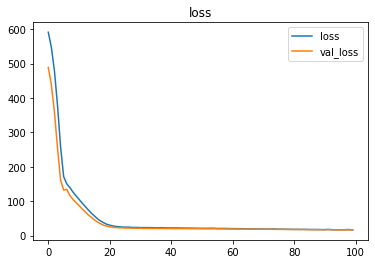

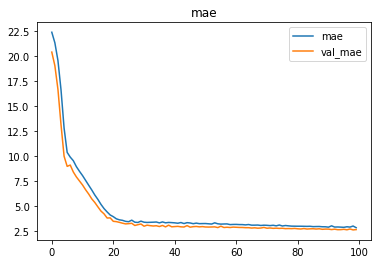

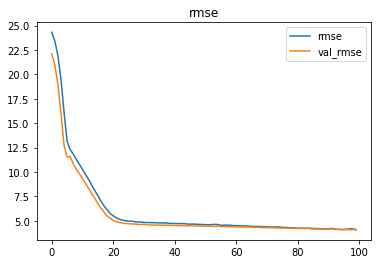

In [20]:
# Apply the custom function to see how your model is doing
plot_history(history)

## Evaluation


In [ ]:
# Make predictions and evaluate your model
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

print('training MAE:', mean_absolute_error(y_train, train_preds))
print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('training R2:', r2_score(y_train, train_preds))
print('\n')
print('testing MAE:', mean_absolute_error(y_test, test_preds))
print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('testing R2:', r2_score(y_test, test_preds))

4/4 [==============================] - 0s 3ms/step
training MAE: 3.7119638453058323
training rmse: 5.340850376294159
training R2: 0.6783477019796071


testing MAE: 3.494978653915285
testing rmse: 4.996363128594822
testing R2: 0.6435147399982024


In [24]:
# Instantiate your sequential model

reg_model = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model.add(Dense(10, activation='relu', input_dim=input_dim, name='h1'))
reg_model.add(Dense(10, activation='relu', name='h2'))
reg_model.add(Dense(10, activation='relu', name='h3'))
reg_model.add(Dense(10, activation='relu', name='h4'))

# Add output layer with 1 node
reg_model.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 10)                70        
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 h3 (Dense)                  (None, 10)                110       
                                                                 
 h4 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


## Compiling

Compiling the model puts all the pieces together to make it ready to train.  We need to specify:

* **Optimizer:** An Adam optimizer is a favorite and often performs well, it's a good place to start.
  - Other optimizers : Gradient Descent,Stochastic Gradient Descent,Adagrad,RMSProp
* **Loss Function:** 'mse' or mean squared error.  This is the number our model will try to reduce in each epoch.  Since this is a regression model we want our model to minimize the mean squared error.
* **Metrics:** 'mae' or mean absolute error.  We can provide a list of any appropriate metrics we want the model to keep track at each epoch.




In [25]:
from tensorflow.keras.metrics import RootMeanSquaredError

In [26]:
# Compile your model.
rmse = RootMeanSquaredError(name='rmse')

reg_model.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

# Training

Let's try training our model for 100 few epochs.  Sometimes that is enough, and it will give us an idea whether our model is learning anything.

In [27]:
# Fit your model

history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100)


Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 612.6592 - mae: 22.8894 - rmse: 24.7520 - val_loss: 526.7858 - val_mae: 21.3705 - val_rmse: 22.9518
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 610.6275 - mae: 22.8441 - rmse: 24.7109 - val_loss: 524.7380 - val_mae: 21.3216 - val_rmse: 22.9072
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 608.2130 - mae: 22.7900 - rmse: 24.6620 - val_loss: 522.1390 - val_mae: 21.2595 - val_rmse: 22.8504
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 605.0004 - mae: 22.7192 - rmse: 24.5968 - val_loss: 518.4734 - val_mae: 21.1719 - val_rmse: 22.7700
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 600.4664 - mae: 22.6155 - rmse: 24.5044 - val_loss: 513.2330 - val_mae: 21.0443 - val_rmse: 22.6546
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 594.1188 - mae: 22.4720 - rmse: 24.3746 - val_loss: 506.2309 

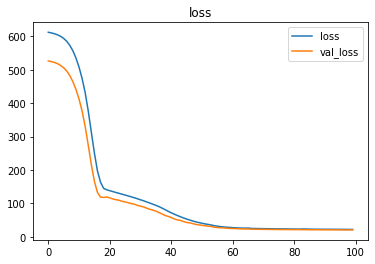

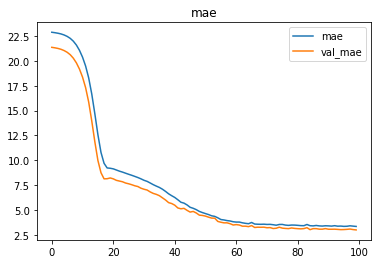

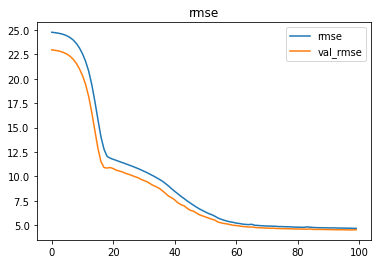

In [28]:
# Apply the custom function to see how your model is doing
plot_history(history)

## Evaluation


In [29]:
# Make predictions and evaluate your model
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

print('training MAE:', mean_absolute_error(y_train, train_preds))
print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('training R2:', r2_score(y_train, train_preds))
print('\n')
print('testing MAE:', mean_absolute_error(y_test, test_preds))
print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('testing R2:', r2_score(y_test, test_preds))

4/4 [==============================] - 0s 3ms/step
training MAE: 3.3190279880111007
training rmse: 4.675045592167463
training R2: 0.7535450547757794


testing MAE: 2.9851600181399367
testing rmse: 4.534190495063666
testing R2: 0.7064155072921211


In [49]:
# Instantiate your sequential model

reg_model = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model.add(Dense(1000, activation='relu', input_dim=input_dim, name='h1'))
reg_model.add(Dropout(.2))
reg_model.add(Dense(1000, activation='relu', name='h2'))
reg_model.add(Dropout(.2))
reg_model.add(Dense(1000, activation='relu', name='h3'))
reg_model.add(Dropout(.2))
reg_model.add(Dense(1000, activation='relu', name='h4'))

# Add output layer with 1 node
reg_model.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 1000)              7000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 h2 (Dense)                  (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 h3 (Dense)                  (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 h4 (Dense)                  (None, 1000)             

## Compiling

Compiling the model puts all the pieces together to make it ready to train.  We need to specify:

* **Optimizer:** An Adam optimizer is a favorite and often performs well, it's a good place to start.
  - Other optimizers : Gradient Descent,Stochastic Gradient Descent,Adagrad,RMSProp
* **Loss Function:** 'mse' or mean squared error.  This is the number our model will try to reduce in each epoch.  Since this is a regression model we want our model to minimize the mean squared error.
* **Metrics:** 'mae' or mean absolute error.  We can provide a list of any appropriate metrics we want the model to keep track at each epoch.




In [50]:
from tensorflow.keras.metrics import RootMeanSquaredError

In [51]:
# Compile your model.
rmse = RootMeanSquaredError(name='rmse')

reg_model.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

# Training

Let's try training our model for 100 few epochs.  Sometimes that is enough, and it will give us an idea whether our model is learning anything.

In [52]:
# Fit your model

history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100)


Epoch 1/100
12/12 [==============================] - 1s 54ms/step - loss: 280.4764 - mae: 13.6809 - rmse: 16.7474 - val_loss: 100.2344 - val_mae: 7.8001 - val_rmse: 10.0117
Epoch 2/100
12/12 [==============================] - 0s 39ms/step - loss: 68.5770 - mae: 6.2359 - rmse: 8.2811 - val_loss: 31.9947 - val_mae: 3.6693 - val_rmse: 5.6564
Epoch 3/100
12/12 [==============================] - 0s 40ms/step - loss: 36.7990 - mae: 4.2974 - rmse: 6.0662 - val_loss: 22.9691 - val_mae: 3.3489 - val_rmse: 4.7926
Epoch 4/100
12/12 [==============================] - 0s 40ms/step - loss: 26.8301 - mae: 3.7367 - rmse: 5.1798 - val_loss: 20.9892 - val_mae: 3.1471 - val_rmse: 4.5814
Epoch 5/100
12/12 [==============================] - 0s 41ms/step - loss: 23.8161 - mae: 3.4964 - rmse: 4.8802 - val_loss: 20.5115 - val_mae: 3.1875 - val_rmse: 4.5290
Epoch 6/100
12/12 [==============================] - 1s 41ms/step - loss: 24.2113 - mae: 3.4163 - rmse: 4.9205 - val_loss: 23.4359 - val_mae: 3.0734 - val_

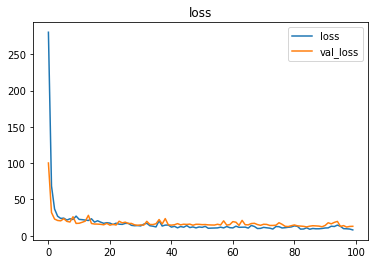

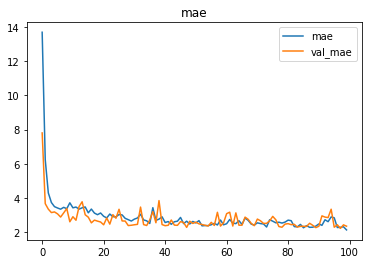

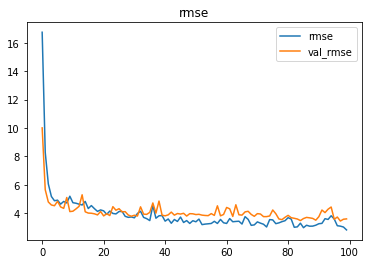

In [53]:
# Apply the custom function to see how your model is doing
plot_history(history)

## Evaluation


In [54]:
# Make predictions and evaluate your model
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

print('training MAE:', mean_absolute_error(y_train, train_preds))
print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('training R2:', r2_score(y_train, train_preds))
print('\n')
print('testing MAE:', mean_absolute_error(y_test, test_preds))
print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('testing R2:', r2_score(y_test, test_preds))

4/4 [==============================] - 0s 9ms/step
training MAE: 1.9369823516201534
training rmse: 2.5457575277946605
training R2: 0.926919769406287


testing MAE: 2.35385066956047
testing rmse: 3.6013748317011793
testing R2: 0.814787523785905
